# Advent of code 2022

## Day 1

See [here](https://adventofcode.com/2022/day/1).

In [ ]:
import numpy as np

elvesfood = {}

with open("day1input.txt", "r") as fp:
     data = fp.readlines()

numelves = 1
elvesfood[numelves] = {"food": []}
maxcals = 0
for line in data:
    num = line.strip()

    if not len(num):
        # get total calories for current elf
        elvesfood[numelves]["totcals"] = sum(elvesfood[numelves]["food"])
        if elvesfood[numelves]["totcals"] > maxcals:
            maxcals = elvesfood[numelves]["totcals"]

        numelves += 1

        # create entry for next elf
        elvesfood[numelves] = {"food": []}
        continue

    elvesfood[numelves]["food"].append(int(num))

# get calories for last elf
elvesfood[numelves]["totcals"] = sum(elvesfood[numelves]["food"])
if elvesfood[numelves]["totcals"] > maxcals:
    maxcals = elvesfood[numelves]["totcals"]

print(f"The largest number of calories is {maxcals}")

The largest number of calories is 73211


In [ ]:
cals = sorted([elvesfood[elf]["totcals"] for elf in elvesfood])
print(cals[-3:])
print(f"The total calories carried by the top three elves is {sum(cals[-3:])}")

[69172, 71575, 73211]
The total calories carried by the top three elves is 213958


In [ ]:
maxcals = np.zeros(3, dtype=int)

with open("day1input.txt", "r") as fp:
     data = fp.readlines()

N = len(data)
calcount = 0
for i in range(N):
    num = data[i].strip()

    if len(num):
        calcount += int(num)
    
    if not len(num) or i == (N - 1):
        gt = np.argwhere(calcount > maxcals).flatten()
        if len(gt) > 0:
             maxcals[gt[0]] = calcount
        calcount = 0

print(f"The maximum number of calories is {max(maxcals)}")
print(f"The sum of the top three calories is {sum(maxcals)}")

The maximum number of calories is 73211
The sum of the top three calories is 213958


## Day 2

See [here](https://adventofcode.com/2022/day/2).

In [ ]:
with open("day2input.txt", "r") as fp:
    lines = fp.readlines()

rules = {
    "X": {"match": "A", "beats": "C", "loses": "B"},
    "Y": {"match": "B", "beats": "A", "loses": "C"},
    "Z": {"match": "C", "beats": "B", "loses": "A"},
}

scores = {"X": 1, "Y": 2, "Z": 3}

matches = [l.strip().split() for l in lines]

score = 0
for match in matches:
    score += scores[match[1]]
    if match[0] == rules[match[1]]["match"]:
        # draw
        score += 3
    elif match[0] == rules[match[1]]["beats"]:
        # win
        score += 6

print(f"Total score after all matches is {score}")

Total score after all matches is 13268


In [ ]:
newrules = {
    "X": "lose",
    "Y": "draw",
    "Z": "win",
}

scores = {
    "A": {"score": 1, "loses": "B", "wins": "C"},
    "B": {"score": 2, "loses": "C", "wins": "A"},
    "C": {"score": 3, "loses": "A", "wins": "B"},
}


score = 0
for match in matches:
    if newrules[match[1]] == "lose":
        score += scores[scores[match[0]]["wins"]]["score"]
    elif newrules[match[1]] == "draw":
        score += 3
        score += scores[match[0]]["score"]
    else:
        score += 6
        score += scores[scores[match[0]]["loses"]]["score"]

print(f"Total score after all matches is {score}")

Total score after all matches is 15508


## Day 3

See [here](https://adventofcode.com/2022/day/3).

In [ ]:
from string import ascii_lowercase, ascii_uppercase

with open("day3input.txt", "r") as fp:
    lines = fp.readlines()

letters = ascii_lowercase + ascii_uppercase
priority = {l: i + 1 for i, l in enumerate(letters)}

score = 0
for line in lines:
    bag = line.strip()
    N = int(len(bag) // 2)
    r1 = bag[:N]
    r2 = bag[N:]

    # find common item
    for l in r1:
        if l in r2:
            break

    score += priority[l]

print(f"The score is {score}")

The score is 8039


In [ ]:
score = 0

for i in range(0, len(lines), 3):
    bag1 = lines[i].strip()
    bag2 = lines[i + 1].strip()
    bag3 = lines[i + 2].strip()

    # find common item in all three bags
    for l in bag1:
        if l in bag2 and l in bag3:
            break

    score += priority[l]

print(f"The score is {score}")

The score is 2510


## Day 4

See [here](https://adventofcode.com/2022/day/4).

In [ ]:
with open("day4input.txt", "r") as fp:
    lines = fp.readlines()

numcont = 0
for line in lines:
    p1, p2 = line.strip().split(",")

    s1, e1 = p1.split("-")
    s2, e2 = p2.split("-")

    if (int(s1) >= int(s2) and int(e1) <= int(e2)) or (int(s2) >= int(s1) and int(e2) <= int(e1)):
        numcont += 1

print(f"Number of ranges contained within the other range: {numcont}")


Number of ranges contained within the other range: 459


In [ ]:
numoverlap = 0
for line in lines:
    p1, p2 = line.strip().split(",")

    s1, e1 = p1.split("-")
    s2, e2 = p2.split("-")

    if (
        (int(s2) <= int(s1) <= int(e2)) or
        (int(s2) <= int(e1) <= int(e2)) or
        (int(s1) >= int(s2) and int(e1) <= int(e2)) or
        (int(s2) >= int(s1) and int(e2) <= int(e1))
    ):
        numoverlap += 1

print(f"Number of ranges contained within the other range: {numoverlap}")

Number of ranges contained within the other range: 779


## Day 5

See [here](https://adventofcode.com/2022/day/5).

In [ ]:
with open("day5input.txt", "r") as fp:
    lines = fp.readlines()

# get input stacks
stacklines = []
for line in lines:
    if len(line.strip()) == 0:
        break

    stacklines.append(line.strip("\n"))

# get stacks
stacks = {}

# number/position
for i, pos in enumerate(stacklines[-1]):
    if pos.isalnum():
        ipos = int(pos)

        stacks[ipos] = []
        for line in stacklines[-2::-1]:
            if line[i].isalnum():
                stacks[ipos].append(line[i])


# get moves
for line in lines:
    if line.startswith("move"):
        vals = line.split()
        num = int(vals[1])
        fromn = int(vals[3])
        ton = int(vals[-1])

        for i in range(num):
            stacks[ton].append(stacks[fromn].pop(-1))

print(f"Top of stacks: {''.join([stacks[i][-1] for i in stacks])}")

Top of stacks: MQTPGLLDN


In [ ]:
# get input stacks
stacklines = []
for line in lines:
    if len(line.strip()) == 0:
        break

    stacklines.append(line.strip("\n"))

# get stacks
stacks = {}

# number/position
for i, pos in enumerate(stacklines[-1]):
    if pos.isalnum():
        ipos = int(pos)

        stacks[ipos] = []
        for line in stacklines[-2::-1]:
            if line[i].isalnum():
                stacks[ipos].append(line[i])

# get moves
for line in lines:
    if line.startswith("move"):
        vals = line.split()
        num = int(vals[1])
        fromn = int(vals[3])
        ton = int(vals[-1])

        moved = []
        for i in range(num):
            moved.append(stacks[fromn].pop(-1))

        for t in moved[::-1]:
            stacks[ton].append(t)

print(f"Top of stacks: {''.join([stacks[i][-1] for i in stacks])}")

Top of stacks: LVZPSTTCZ


## Day 6

See [here](https://adventofcode.com/2022/day/6).

In [ ]:
with open("day6input.txt", "r") as fp:
    data = fp.readlines()

data = data[0].strip()

import numpy as np

for i in range(len(data) - 4):
    if len(np.unique(list(data[i: i + 4]))) == 4:
        break

print(f"Start of the sequence is at {i + 4}")

Start of the sequence is at 1760


In [ ]:
for i in range(len(data) - 14):
    if len(np.unique(list(data[i: i + 14]))) == 14:
        break

print(f"Start of the message is at {i + 14}")

Start of the message is at 2974


## Day 7

See [here](https://adventofcode.com/2022/day/7).

In [ ]:
class DirectoryTree:
    def __init__(self):
        self.prev = None
        self.head = Directory(self.prev, "/")
        self._cwd = self.head

        self.rsizelim = 0
        self.mindiff = 7000000000000
        self.mindir = 0

    @property
    def cwd(self):
        return self._cwd

    def cd(self, directory):
        """
        Change to new directory.
        """

        dir = self.cwd

        if directory in dir.subdirectories:
            self._cwd = dir.subdirectories[directory]
        elif directory == "..":
            self._cwd = dir.parent

    def add_directory(self, directory):
        dir = self.cwd
        dir.subdirectories[directory] = Directory(dir, directory)

    def add_file(self, file, size):
        dir = self.cwd
        dir.files.append((file, size))
        dir.size += size

    def root(self):
        self._cwd = self.head

    def recursive_size(self, start=0, num=100000):
        if start == 0:
            dir = self.head
        else:
            dir = start

        dir.recursive_size += dir.size

        for subdir in dir.subdirectories:
            dir.recursive_size += self.recursive_size(start=dir.subdirectories[subdir], num=num)

        if dir.recursive_size <= num:
            self.rsizelim += dir.recursive_size

        return dir.recursive_size

    def find_directory_to_delete(self, start=0, size=70000000):
        unused = size - self.head.recursive_size

        todelete = 30000000 - unused

        if start == 0:
            dir = self.head
        else:
            dir = start

        if dir.recursive_size >= todelete:
            diff = dir.recursive_size - todelete

            if diff < self.mindiff:
                self.mindiff = diff
                self.mindir = dir.recursive_size

        for subdir in dir.subdirectories:
            self.find_directory_to_delete(start=dir.subdirectories[subdir], size=size)


class Directory:
    def __init__(self, parent, name):
        self.name = name
        self.parent = parent

        self.subdirectories = {}
        self.files = []

        self.size = 0
        self.recursive_size = 0


# populate file system
fs = DirectoryTree()

with open("day7input.txt", "r") as fp:
    lines = fp.readlines()

#testdata = """$ cd /
#$ ls
#dir a
#14848514 b.txt
#8504156 c.dat
#dir d
#$ cd a
#$ ls
#dir e
#29116 f
#2557 g
#62596 h.lst
#$ cd e
#$ ls
#584 i
#$ cd ..
#$ cd ..
#$ cd d
#$ ls
#4060174 j
#8033020 d.log
#5626152 d.ext
#7214296 k
#"""

#lines = testdata.strip().split("\n")

i = 0
while i < len(lines):
    line = lines[i].strip()
    #print(i, line)

    if line.startswith("$"):
        if line.strip("$").strip().startswith("cd"):
            # get directory to change to
            dirname = line.split()[-1]
            fs.cd(dirname)
            i += 1
        elif line.strip("$").strip().startswith("ls"):
            i += 1

            while not lines[i].startswith("$"):
                # add in directories
                line = lines[i].strip()

                if line.startswith("dir"):
                    dirname = line.split()[-1]
                    fs.add_directory(dirname)
                else:
                    # add in files
                    fsize, fname = line.split()
                    fs.add_file(fname, int(fsize))

                i += 1
                if i == len(lines):
                    break


fs.recursive_size()

print(f"Sum of directories with sizes <= 100000 is {fs.rsizelim}")

Sum of directories with sizes <= 100000 is 1084134


In [ ]:
fs.find_directory_to_delete()

print(f"Size of directory to delete is {fs.mindir}")

Size of directory to delete is 6183184


## Day 8

See [here](https://adventofcode.com/2022/day/8).

In [ ]:
import numpy as np

grid = []
with open("day8input.txt", "r") as fp:
    for line in fp.readlines():
        grid.append(list(line.strip()))

grid = np.array(grid)

numvisible = 0
nx, ny = grid.shape

for i in range(1, nx - 1):
    for j in range(1, ny - 1):
        pos = grid[i, j]
        left = grid[i, :j]
        right = grid[i, j + 1:]
        above = grid[:i, j]
        below = grid[i + 1:, j]

        for direction in [left, right, above, below]:
            if sum(direction >= pos) == 0:
                numvisible += 1
                break

# add edge trees
numvisible += 2 * nx + 2 * (ny - 2)

print(f"Number of visible trees is {numvisible}")

Number of visible trees is 1798


In [ ]:
maxscenic = 0

for i in range(1, nx - 1):
    for j in range(1, ny - 1):
        pos = grid[i, j]
        left = grid[i, :j]
        right = grid[i, j + 1:]
        above = grid[:i, j]
        below = grid[i + 1:, j]

        dists = []
        for direction in [left[::-1], right, above[::-1], below]:
            for k in range(len(direction)):
                if direction[k] >= pos or k == len(direction) - 1:
                    dists.append(k + 1)
                    break

        p = np.prod(dists)

        if p > maxscenic:
            maxscenic = p

print(f"Maximum scenic value is {maxscenic}")

Maximum scenic value is 259308


## Day 9

See [here](https://adventofcode.com/2022/day/9).

In [ ]:
import numpy as np

with open("day9input.txt", "r") as fp:
    data = fp.readlines()

headcur = [0, 0]
headprev = [0, 0]
tailcur = [0, 0]

tailvisited = [tailcur]

# get size of grid
width = 0
height = 0

dirs = {"R": 0, "L": 0, "U": 0, "D": 0}

for line in data:
    dir, num = line.strip().split()
    dirs[dir] += int(num)

grid = np.zeros((dirs["L"] + dirs["R"], dirs["U"] + dirs["D"]), dtype=int) 

istart = dirs["L"]
jstart = dirs["D"]

headcur = [istart, jstart]
tailcur = [istart, jstart]

grid[tuple(tailcur)] = 1

for line in data:
    dir, num = line.strip().split()

    for i in range(int(num)):
        headprev = list(headcur)
        if dir == "L":
            headcur[0] -= 1
        elif dir == "R":
            headcur[0] += 1
        elif dir == "U":
            headcur[1] += 1
        else:
            headcur[1] -= 1

        if abs(tailcur[1] - headcur[1]) == 2 or abs(tailcur[0] - headcur[0]) == 2:
            tailcur = list(headprev)
            grid[tuple(tailcur)] = 1

print(f"Number of positions visited by tail is {np.sum(grid)}")

Number of positions visited by tail is 6026


In [ ]:
import copy

grid = np.zeros((dirs["L"] + dirs["R"], dirs["U"] + dirs["D"]), dtype=int) 

#data = """R 5
#U 8
#L 8
#D 3
#R 17
#D 10
#L 25
#U 20
#"""

#data = data.strip().split("\n")

#grid = np.zeros((22, 23), dtype=int)

istart = dirs["L"]
jstart = dirs["D"]

#istart = 11
#jstart = 6

knots = [[istart, jstart] for i in range(10)]

grid[tuple(knots[0])] = 1

for line in data:
    dir, num = line.strip().split()

    for i in range(int(num)):
        if dir == "L":
            knots[0][0] -= 1
        elif dir == "R":
            knots[0][0] += 1
        elif dir == "U":
            knots[0][1] += 1
        else:
            knots[0][1] -= 1

        # head down knots
        for j in range(1, 10):
            if abs(knots[j][1] - knots[j - 1][1]) == 2:
                knots[j][1] -= np.sign(knots[j][1] - knots[j - 1][1])

                if abs(knots[j][0] - knots[j - 1][0]) == 1:
                    knots[j][0] -= np.sign(knots[j][0] - knots[j - 1][0])
            elif abs(knots[j][0] - knots[j - 1][0]) == 2:
                knots[j][0] -= np.sign(knots[j][0] - knots[j - 1][0])

                if abs(knots[j][1] - knots[j - 1][1]) == 1:
                    knots[j][1] -= np.sign(knots[j][1] - knots[j - 1][1])

        grid[tuple(knots[-1])] = 1

print(f"Number of positions visited by tail is {np.sum(grid)}")

Number of positions visited by tail is 173


In [ ]:
grid.T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

## Day 10

See [here](https://adventofcode.com/2022/day/10).

In [ ]:
import numpy as np

with open("day10input.txt", "r") as fp:
    data = fp.readlines()

X = 1

signalstrength = 0
cycle = 1
for i, line in enumerate(data):
    if cycle > 220:
        break
    
    if line.startswith("noop"):
        if not (cycle - 20) % 40:
            signalstrength += X * cycle
        cycle += 1
        continue
    else:
        num = int(line.split()[-1])

        for i in range(2):
            if not (cycle - 20) % 40:
                signalstrength += X * cycle
            cycle += 1

        X += num

print(signalstrength)

20 12
60 4
100 39
140 22
180 17
220 21
15140


## Day 11

See [here](https://adventofcode.com/2022/day/11).

In [ ]:
import numpy as np


def make_fun(num, fun):
    exec(f"def f_make_fun_{num}(old): return {fun}")
    return locals()[f"f_make_fun_{num}"]


class Monkey:
    def __init__(self, monkey, num=0, worrydivisor=1):
        for line in monkey:
            if line.strip().startswith("Starting items"):
                items = line.split(":")[-1].strip().split(",")
                self.items = [int(i) for i in items]
            elif line.strip().startswith("Operation"):
                #self.op = line.strip().split("=")[-1]
                op = line.strip().split("=")[-1]
                self.operation = make_fun(num, op)
            elif line.strip().startswith("Test"):
                self.divisible_by = int(line.strip().split()[-1])
            elif "true" in line:
                self.monkeytrue = int(line.strip().split()[-1])
            elif "false" in line:
                self.monkeyfalse = int(line.strip().split()[-1])

        self.worrydivisor = worrydivisor

        self.total_inspections = 0

    #def operation(self, old):
    #    return eval(self.op)

    def throw_item(self):
        item = self.items.pop(0)

        worrylevel = self.operation(item)
        worrylevel /= self.worrydivisor
        worrylevel = np.floor(worrylevel)

        self.total_inspections += 1

        if (worrylevel / self.divisible_by).is_integer():
            return int(worrylevel), self.monkeytrue
        else:
            return int(worrylevel), self.monkeyfalse


def create_monkeys():
    with open("day11input.txt") as fp:
        data = fp.read()

    monkeytext = [m.strip().split("\n")[1:] for m in data.split("Monkey")[1:]]

    monkeys = {}
    for i, monkey in enumerate(monkeytext):
        monkeys[i] = Monkey(monkey, num=i, worrydivisor=3)

    return monkeys


monkeys = create_monkeys()

nrounds = 20

for i in range(nrounds):
    for monkey in monkeys:
        while len(monkeys[monkey].items) > 0:
            wl, wm = monkeys[monkey].throw_item()
            monkeys[wm].items.append(wl)

for monkey in monkeys:
    print(monkeys[monkey].total_inspections)

mb = np.prod(sorted([monkeys[monkey].total_inspections for monkey in monkeys])[-2:])

print(f"Total level of monkey business is {mb}")

14
332
330
21
337
344
302
349
Total level of monkey business is 120056


In [ ]:
def create_monkeys():
    with open("day11input.txt") as fp:
        data = fp.read()

    monkeytext = [m.strip().split("\n")[1:] for m in data.split("Monkey")[1:]]

    monkeys = {}
    for i, monkey in enumerate(monkeytext):
        monkeys[i] = Monkey(monkey, num=i, worrydivisor=1)

    return monkeys


monkeys = create_monkeys()

nrounds = 10

inspections = {monkey: [] for monkey in monkeys}

for i in range(nrounds):
    for monkey in monkeys:
        while len(monkeys[monkey].items) > 0:
            wl, wm = monkeys[monkey].throw_item()
            monkeys[wm].items.append(wl)
        inspections[monkey].append(monkeys[monkey].total_inspections)

mb = np.prod(sorted([monkeys[monkey].total_inspections for monkey in monkeys])[-2:])

print(f"Total level of monkey business is {mb}")

Total level of monkey business is 23256


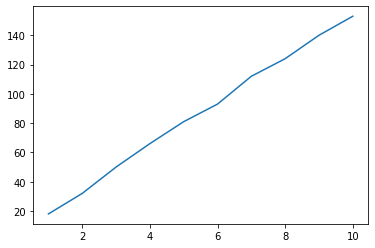

In [ ]:
from matplotlib import pyplot as plt

plt.plot(range(1, 11), inspections[7])

## Day 12

See [here](https://adventofcode.com/2022/day/12).

In [ ]:
from string import ascii_lowercase

import numpy as np

data = """Sabqponm
abcryxxl
accszExk
acctuvwj
abdefghi
"""

height = {ascii_lowercase[i]: i for i in range(len(ascii_lowercase))}

agrid = np.array([list(line.strip()) for line in data.strip().split("\n")])
ngrid = np.zeros_like()

start = np.argwhere(agrid == "S")[0]
end = np.argwhere(agrid == "E")[0]

minpath = 0

def check_route(grid, pos):
    possible = []
    N, M = grid.shape
    
    height = grid[pos]

    if 0 <= pos[0] - 1 < N:
        if abs(grid[pos[0] - 1, pos[1]]
        

In [ ]:
height

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

## Day 13

See [here](https://adventofcode.com/2022/day/13).

In [ ]:
from ast import literal_eval

with open("day13input.txt", "r") as fp:
    data = fp.readlines()

data = [line.strip() for line in data]

pairs = {}
i = 0
j = 1
while True:
     if len(data[i]) == 0:
         i += 1
         continue
     else:
         pairs[j] = [literal_eval(data[i]), literal_eval(data[i + 1])]
         i += 2
         j += 1

     if i >= len(data):
         break


In [ ]:
correctidx = []

def compare(left, right):
    correct = 1
    incorrect = -1
    undecided = 0

    if isinstance(left, int):
        left = [left]
    
    if isinstance(right, int):
        right = [right]

    N = max([len(left), len(right)])

    output = undecided
    for i in range(N):
        if i >= len(left):
            output = correct
            break
        elif i >= len(right):
            output = incorrect
            break
        elif isinstance(left[i], list) or isinstance(right[i], list):
            output = compare(left[i], right[i])

            if output != undecided:
                break
        elif left[i] < right[i]:
            output = correct
            break
        elif left[i] > right[i]:
            output = incorrect
            break

    return output


sump = 0
for pidx in pairs:
    left = pairs[pidx][0]
    right = pairs[pidx][1]

    if compare(left, right) == 1:
        sump += pidx

print(f"Sum of correct indices: {sump}")

Sum of correct indices: 4643


In [ ]:
from functools import cmp_to_key

keyfunc = cmp_to_key(compare)

listvals = [[[2]], [[6]]]
for pidx in pairs:
    listvals.append(pairs[pidx][0])
    listvals.append(pairs[pidx][1])

sortedlist = sorted(listvals, key=keyfunc, reverse=True)

twoindex = sortedlist.index([[2]]) + 1
sixindex = sortedlist.index([[6]]) + 1

deckey = twoindex * sixindex

print(f"Decoder key is {deckey}")

Decoder key is 21614


## Day 14

See [here](https://adventofcode.com/2022/day/14).

In [56]:
import numpy as np

#testinput = """498,4 -> 498,6 -> 496,6
#503,4 -> 502,4 -> 502,9 -> 494,9
#"""

with open("day14input.txt", "r") as fp:
    data = fp.readlines()

starts = []
ends = []

maxx = 0
minx = 10000000
maxy = 0

#for line in testinput.split("\n"):
for line in data:
    if len(line.strip()) > 0:
        parts = line.strip().split("->")
        n = len(parts)

        for i, part in enumerate(parts):
            x, y = part.strip().split(",")
             
            if i < n - 1:
                starts.append((int(x), int(y)))
            if i > 0:
                ends.append((int(x), int(y)))

            if int(x) > maxx:
                maxx = int(x)

            if int(x) < minx:
                minx = int(x)

            if int(y) > maxy:
                maxy = int(y)


origin = [500, 0]

dx = maxx - minx
dy = maxy

grid = np.full((dx + 1, dy + 1), ".", dtype=str)

offsetx = origin[0] - minx

for start, end in zip(starts, ends):
    x0, x1 = sorted([start[0] - minx, end[0] - minx])
    y0, y1 = sorted([start[1], end[1]])
    grid[x0:(x1 + 1), y0:(y1 + 1)] = "#"

nsand = 0
sandstart = [offsetx, 0]
x, y = sandstart

while True:
    if grid[x, y + 1] == ".":
        # check sand can move down
        y += 1
    elif x - 1 >= 0 and x < dx + 1:
        if grid[x - 1, y + 1] == ".":
            # check sand can move down and left
            y += 1
            x -= 1
        elif grid[x + 1, y + 1] == ".":
            # check sand can move down and right
            y += 1
            x += 1
        else:
            # sand comes to rest
            grid[x, y] = "o"
            nsand += 1
            x, y = sandstart  # reset new sand
    else:
        # sand goes over edge
        break

print(f"Number of units of sand: {nsand}")

Number of units of sand: 755


In [81]:
#testinput = """498,4 -> 498,6 -> 496,6
#503,4 -> 502,4 -> 502,9 -> 494,9
#"""

with open("day14input.txt", "r") as fp:
    data = fp.readlines()

starts = []
ends = []

maxx = 0
minx = 10000000
maxy = 0


for line in data:
    if len(line.strip()) > 0:
        parts = line.strip().split("->")
        n = len(parts)

        for i, part in enumerate(parts):
            x, y = part.strip().split(",")
             
            if i < n - 1:
                starts.append((int(x), int(y)))
            if i > 0:
                ends.append((int(x), int(y)))

            if int(x) > maxx:
                maxx = int(x)

            if int(x) < minx:
                minx = int(x)

            if int(y) > maxy:
                maxy = int(y)


origin = [500, 0]

# make sure x range is large enough to accomadate all sand
dx = (maxx - minx)
dy = maxy
dx = dx + 2 * int(np.sqrt(dx**2 + dy**2))

minx = origin[0] - int(dx / 2)

grid = np.full((dx + 1, dy + 1 + 2), ".", dtype=str)

offsetx = origin[0] - minx

for start, end in zip(starts, ends):
    x0, x1 = sorted([start[0] - minx, end[0] - minx])
    y0, y1 = sorted([start[1], end[1]])
    grid[x0:(x1 + 1), y0:(y1 + 1)] = "#"

grid[:, maxy + 2] = "#"

# fill in grid with sand
nsand = 0
sandstart = [offsetx, 0]
x, y = sandstart

while True:
    if grid[x, y + 1] == ".":
        # check sand can move down
        y += 1
    else:
        if grid[x - 1, y + 1] == ".":
            # check sand can move down and left
            y += 1
            x -= 1
        elif grid[x + 1, y + 1] == ".":
            # check sand can move down and right
            y += 1
            x += 1
        else:
            # sand comes to rest
            grid[x, y] = "o"
            nsand += 1
            
            if [x, y] == sandstart:
                # sand at rest at origin
                break
            else:
                x, y = sandstart  # reset new sand


print(f"Number of units of sand: {nsand}")

Number of units of sand: 29805
